In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
train_df = pd.read_csv('./input/train.csv.zip')
test_df = pd.read_csv('./input/test.csv.zip')

## EDA

In [3]:
train_df.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,957919.000000,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,478959.000000,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,276527.540593,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,0.000000,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,239479.500000,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,478959.000000,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,718438.500000,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,957918.000000,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


In [4]:
train_df.isna().sum().describe()

count      120.000000
mean     15173.183333
std       1986.811943
min          0.000000
25%      15357.500000
50%      15436.000000
75%      15507.500000
max      15678.000000
dtype: float64

In [5]:
X, y = train_df.iloc[:, 1:-1], train_df.iloc[:, -1]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(957919, 118) (957919,)
(718439, 118) (239480, 118) (718439,) (239480,)


<AxesSubplot:>

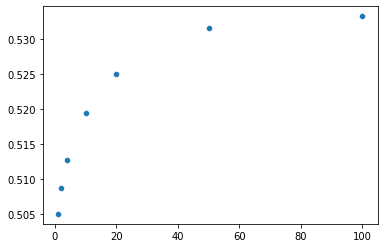

In [6]:
results = []
for n_params in [1, 2, 4, 10, 20, 50, 100]:
    pipe = make_pipeline(
        SimpleImputer(strategy='mean'),
        PowerTransformer(),
        SelectKBest(f_classif, k=n_params),
        LogisticRegression(random_state=33, n_jobs=-1)
    )
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    results.append([n_params, score])

sns.scatterplot(x=[i[0] for i in results], y=[i[1] for i in results])

<AxesSubplot:>

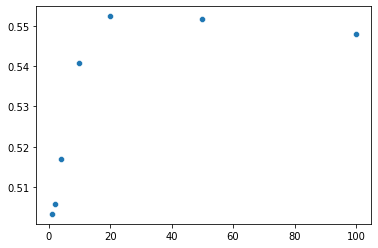

In [7]:
results = []
for n_params in [1, 2, 4, 10, 20, 50, 100]:
    pipe = make_pipeline(
        SimpleImputer(strategy='mean'),
        PowerTransformer(),
        SelectKBest(f_classif, k=n_params),
        RandomForestClassifier(random_state=33, n_jobs=-1)
    )
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    results.append([n_params, score])

sns.scatterplot(x=[i[0] for i in results], y=[i[1] for i in results])